In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [131]:
data = pd.read_csv('housing.csv')

In [132]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [133]:
data.dropna(inplace=True)
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [81]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
X_train = pd.get_dummies(X_train, columns=['ocean_proximity'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['ocean_proximity'], drop_first=True)

In [135]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,avg_rooms
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,0,0,0,0,0.209429,4.951740
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,1,0,0,0,0.174710,5.954023
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,1,0,0,0,0.217939,5.126482
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,0,0,0,0,0.401778,2.642058
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,0,0,0,1,0.213159,4.551980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,0,0,0,0,0.167168,6.602649
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,0,0,0,0,0.177044,5.840160
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,0,0,0,0,0.231493,4.403315
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,0,0,1,0,0.186047,5.410596


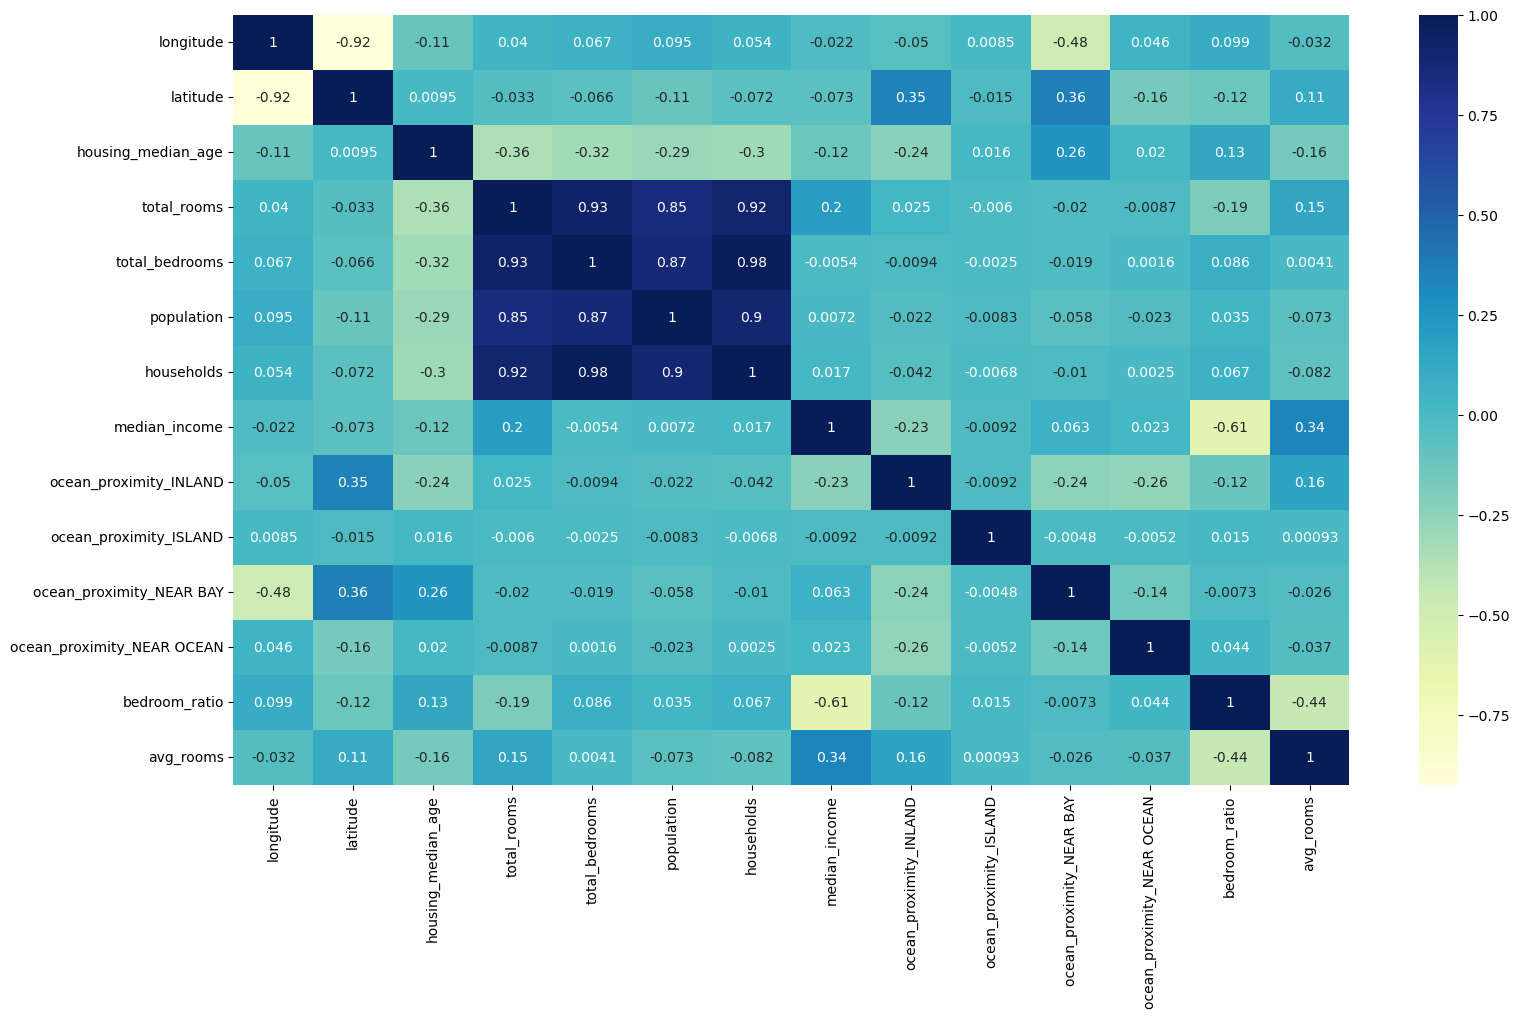

In [87]:
plt.figure(figsize=(18, 10))
sns.heatmap(X_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [136]:
X_train['bedroom_ratio'] = X_train['total_bedrooms'] / X_train['total_rooms']
X_train['avg_rooms'] = X_train['total_rooms'] / X_train['households']
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,bedroom_ratio,avg_rooms
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,0,0,0,0,0.209429,4.951740
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,1,0,0,0,0.174710,5.954023
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,1,0,0,0,0.217939,5.126482
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,0,0,0,0,0.401778,2.642058
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,0,0,0,1,0.213159,4.551980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,0,0,0,0,0.167168,6.602649
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,0,0,0,0,0.177044,5.840160
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,0,0,0,0,0.231493,4.403315
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,0,0,1,0,0.186047,5.410596


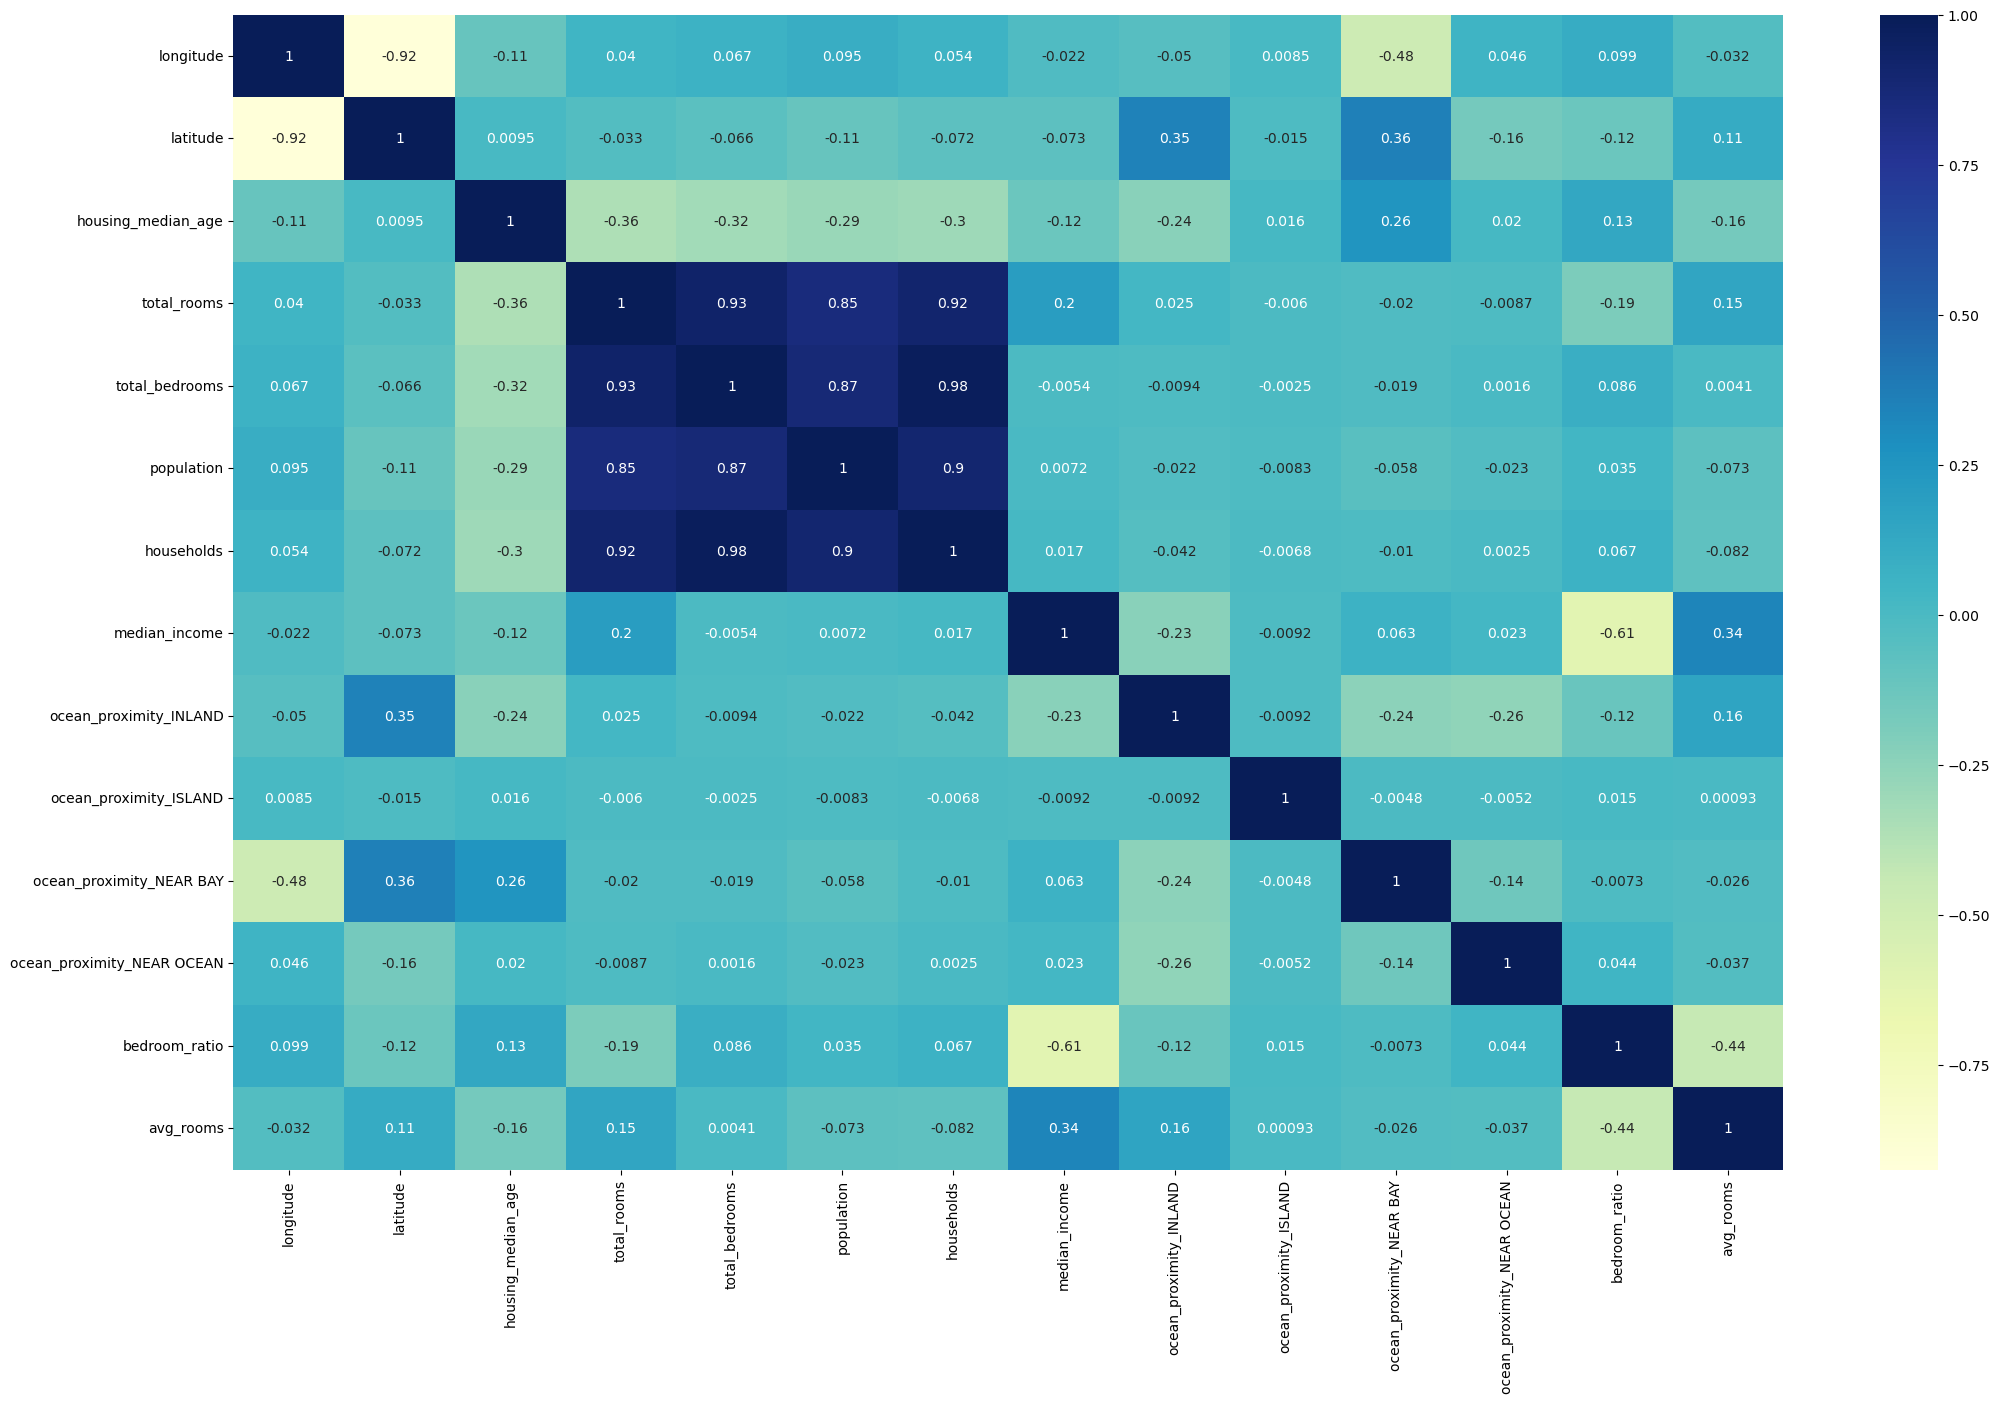

In [140]:
plt.figure(figsize=(25, 15))
sns.heatmap(X_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

<Axes: xlabel='latitude', ylabel='longitude'>

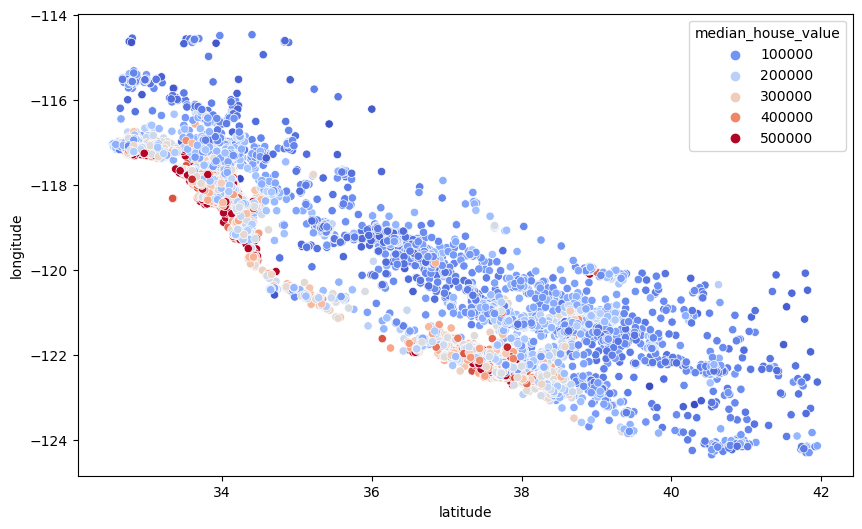

In [130]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='latitude', y='longitude', data=X_train, hue=y_train, palette='coolwarm')

In [128]:
y_train = y_train

In [129]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [123]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

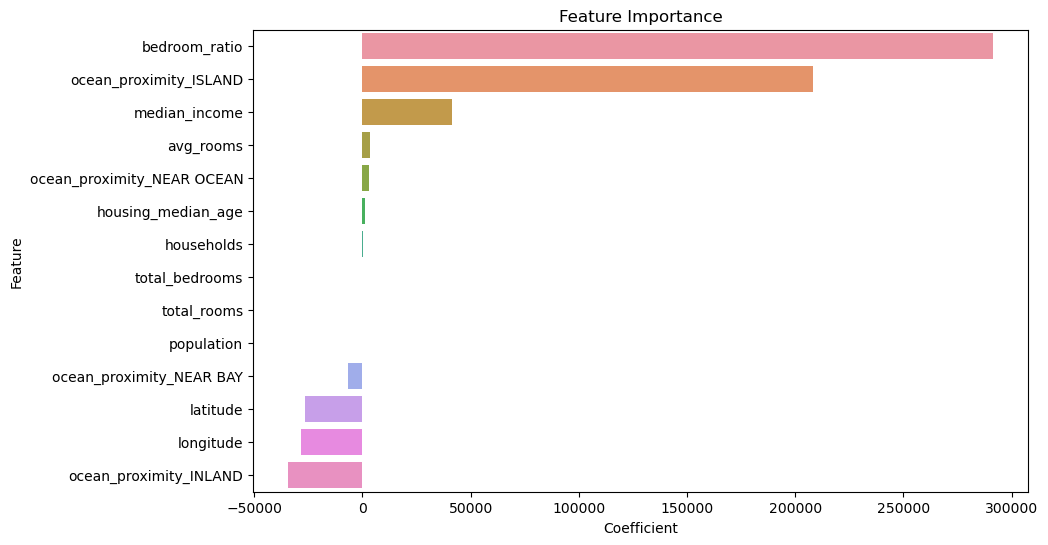

In [126]:
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

In [117]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [119]:
rf_pred = random_forest_model.predict(X_test)

In [141]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("\nRandom Forest Regression:")
print(f"Mean Squared Error: {rf_mse}")
print(f"R-squared: {rf_r2}")


Random Forest Regression:
Mean Squared Error: 2385336928.5104446
R-squared: 0.8255718175993735
